In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv("../datasets/INFY.csv")

In [3]:
df.set_index(df.columns[0], inplace=True)
df = df.T
df

INFY,Close,Net Sales/Income from operations,Employees Cost,depreciat,Other Expenses,Other Income,P/L Before Tax,P/L After Tax,Net Profit/(Loss) For the Period,Equity Share Capital,Basic EPS,ROE,ROCE,ROA,Quick Ratio
Mar '04,51.045002,1308.90,620.53,62.08,69.36,3.18,387.05,337.05,337.05,33.32,186.60,38.22,38.22,24.20,1.65
Jun '04,59.861252,1471.39,691.27,49.38,100.64,17.99,459.47,394.47,394.47,33.43,186.60,38.22,38.22,24.20,1.65
Sep '04,67.139999,1689.56,779.55,56.55,130.41,30.23,533.35,454.85,454.85,133.93,186.60,38.22,38.22,24.20,1.65
Dec '04,84.240005,1798.52,856.62,69.38,103.53,46.77,588.97,495.97,495.97,134.73,186.60,38.22,38.22,24.20,1.65
Mar '05,75.481880,1900.19,854.56,92.91,138.35,32.51,602.70,513.90,559.09,135.29,70.21,36.24,36.24,28.83,2.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jun '23,389.149994,31811.00,16353.00,746.00,7524.00,1001.00,8146.00,5956.00,5956.00,2075.00,55.48,34.34,43.03,22.96,1.90
Sep '23,406.049988,32629.00,16435.00,738.00,8200.00,1350.00,8517.00,6245.00,6245.00,2075.00,55.48,34.34,43.03,22.96,1.90
Dec '23,471.299988,32491.00,16304.00,738.00,8073.00,1582.00,8876.00,6552.00,6552.00,2075.00,55.48,34.34,43.03,22.96,1.90
Mar '24,480.100006,32001.00,16047.00,722.00,8239.00,3483.00,10414.00,8480.00,8480.00,2075.00,65.62,33.54,41.23,23.69,2.62


In [4]:
close_column = df['Close']

columns_to_scale = df.columns.difference(['Close'])

scaler = MinMaxScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df['Close'] = close_column

In [5]:
df

INFY,Close,Net Sales/Income from operations,Employees Cost,depreciat,Other Expenses,Other Income,P/L Before Tax,P/L After Tax,Net Profit/(Loss) For the Period,Equity Share Capital,Basic EPS,ROE,ROCE,ROA,Quick Ratio
Mar '04,51.045002,0.000000,0.000000,0.018231,0.000000,0.001486,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.784111,0.585593,0.000000
Jun '04,59.861252,0.005082,0.004456,0.000000,0.003656,0.005736,0.007223,0.007051,0.007051,0.000051,1.000000,1.000000,0.784111,0.585593,0.000000
Sep '04,67.139999,0.011905,0.010017,0.010293,0.007136,0.009248,0.014591,0.014467,0.014467,0.046781,1.000000,1.000000,0.784111,0.585593,0.000000
Dec '04,84.240005,0.015313,0.014872,0.028710,0.003994,0.013994,0.020138,0.019516,0.019516,0.047153,1.000000,1.000000,0.784111,0.585593,0.000000
Mar '05,75.481880,0.018493,0.014743,0.062487,0.008065,0.009902,0.021507,0.021718,0.027268,0.047413,0.238983,0.889447,0.695242,0.977966,0.308540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jun '23,389.149994,0.953963,0.991055,1.000000,0.871415,0.287805,0.773810,0.690039,0.690039,0.949318,0.142670,0.783361,1.000000,0.480508,0.068871
Sep '23,406.049988,0.979546,0.996220,0.988516,0.950436,0.387948,0.810810,0.725529,0.725529,0.949318,0.142670,0.783361,1.000000,0.480508,0.068871
Dec '23,471.299988,0.975230,0.987968,0.988516,0.935591,0.454519,0.846613,0.763231,0.763231,0.949318,0.142670,0.783361,1.000000,0.480508,0.068871
Mar '24,480.100006,0.959905,0.971779,0.965548,0.954995,1.000000,1.000000,1.000000,1.000000,0.949318,0.208971,0.738693,0.919210,0.542373,0.267218


In [17]:
def create_sequences(df, sequence_length):
    sequences = []
    labels = []
    for i in range(len(df) - sequence_length):
        sequence = df.iloc[i:i + sequence_length].drop(columns=['Close'])
        label = df['Close'].iloc[i + sequence_length]
        sequences.append(sequence.values)
        labels.append(label)
    return np.array(sequences), np.array(labels)

sequence_length = 30

X, y = create_sequences(df, sequence_length)

In [18]:
X, y = create_sequences(df, sequence_length)

train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

In [19]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [22]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/1000
2/2 [==============================] - 0s 108ms/step - loss: 18460.0000 - val_loss: 112844.0703
Epoch 2/1000
2/2 [==============================] - 0s 66ms/step - loss: 17803.5977 - val_loss: 111747.7734
Epoch 3/1000
2/2 [==============================] - 0s 61ms/step - loss: 16032.9834 - val_loss: 110666.8203
Epoch 4/1000
2/2 [==============================] - 0s 79ms/step - loss: 16330.9219 - val_loss: 109581.1719
Epoch 5/1000
2/2 [==============================] - 0s 61ms/step - loss: 17015.1699 - val_loss: 108505.0000
Epoch 6/1000
2/2 [==============================] - 0s 61ms/step - loss: 15255.1367 - val_loss: 107446.8828
Epoch 7/1000
2/2 [==============================] - 0s 59ms/step - loss: 15354.5215 - val_loss: 106419.8984
Epoch 8/1000
2/2 [==============================] - 0s 64ms/step - loss: 16034.9785 - val_loss: 105395.7734
Epoch 9/1000
2/2 [==============================] - 0s 64ms/step - loss: 15604.8213 - val_loss: 104397.4297
Epoch 10/1000
2/2 [========

1/1 [==============================] - 0s 33ms/step


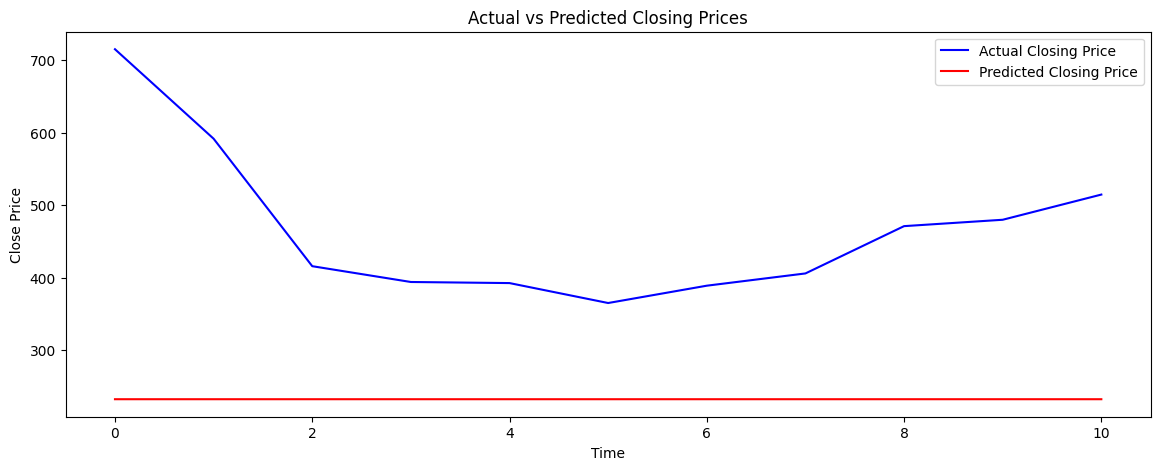

In [23]:
predicted_prices = model.predict(X_test)

plt.figure(figsize=(14, 5))
plt.plot(y_test, color='blue', label='Actual Closing Price')
plt.plot(predicted_prices, color='red', label='Predicted Closing Price')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()